# Example: Downy Woodpecker

### Set Variables - fill out stuff in this cell.  
Notes:
default_coordUncertainty -- coordinateUncertaintyInMeters is often not provided.  Here is an option to use a default.  If you don't want anything entered, set this equal to False (boolean, not string).

In [1]:
configDir = "" # Path to folder where you saved your wildlifeconfig file.
taxon_id = 'bdowox1'
summary_name = 'dowobig'
gbif_req_id = 'Gr26'
gbif_filter_id = 'GBIFf9'
default_coordUncertainty = 1000       # Note above.

There is a bug with mpl_toolkits, the following code is a temporary fix until they resolve the bug.
https://stackoverflow.com/questions/52911232/basemap-library-using-anaconda-jupyter-notebooks-keyerror-proj-lib/54087410#54087410

os.environ['PROJ_LIB'] should be set equal to something like "c:/Users/jramone/AppData/Local/Continuum/miniconda3/envs/wrangler/Library/share"

In [2]:
import os
os.environ['PROJ_LIB'] = ""

### Setup - nothing to fill out in this cell

In [3]:
%matplotlib inline
import sqlite3
import pprint
import json
import pandas as pd
import numpy as np
pd.set_option('display.width', 600)
pd.set_option('display.max_colwidth', 30)
pd.set_option('display.max_rows', 150)
from IPython.display import Image
from pygbif import occurrences
import matplotlib.pyplot as plt
import os
from datetime import datetime
t1 = datetime.now()
import sys
sys.path.append(configDir)
import wranglerconfig as config
codeDir = config.codeDir
paramdb = config.paramdb
sys.path.append(codeDir)
import wrangler_functions as functions
outDir = config.workDir
spdb = outDir + taxon_id + gbif_req_id + gbif_filter_id + '.sqlite'
username = config.gbif_username
password = config.gbif_password
email = config.gbif_email
print("Notebook run " + str(t1))
print(spdb)
connjup = sqlite3.connect(paramdb)
cursorjup = connjup.cursor()
# Get some variables
years = connjup.execute("""SELECT years_range 
                           FROM gbif_requests WHERE request_id = '{0}'""".format(gbif_req_id)).fetchone()[0]
common_name = connjup.execute("""SELECT common_name
                                 FROM taxa_concepts WHERE taxon_id = '{0}'""".format(taxon_id)).fetchone()[0]

Notebook run 2021-01-12 15:59:29.993126
T:/Occurrence_Records/bdowox1Gr26GBIFf9.sqlite


# Taxon Concept
Display species information from your wildlife-wrangler.sqlite database.

In [4]:
vals = cursorjup.execute("SELECT * FROM taxa_concepts WHERE taxon_id = '{0}';".format(taxon_id)).fetchall()[0]
cols = [x[1] for x in cursorjup.execute("PRAGMA table_info('taxa_concepts')").fetchall()]
sp_dict = dict(zip(cols, vals))
sp_df = pd.DataFrame.from_dict(sp_dict, orient='index', columns=['VALUE'])
sp_df.index.name = 'ATTRIBUTE'
print("TAXON CONCEPT RECORD")
print(sp_df)

TAXON CONCEPT RECORD
                                                   VALUE
ATTRIBUTE                                               
taxon_id                                         bdowox1
fws_id                                              None
gap_id                                              None
itis_tsn                                            None
gbif_id                                          9149595
ebird_id                                            None
common_name                             downy woodpecker
scientific_name                      Dryobates pubescens
start_year                                          2018
split_from                                       bdowox0
end_year                                            None
lumped_into                                         None
geometry                                            None
detection_distance_meters                            200
retro_misid_risk                                    None
vetted_how

# Filters
Display the parameters of the request filter set.  These are deployed during the step where records are retrieved from the API.

In [5]:
request_df = pd.read_sql_query(sql="SELECT * FROM gbif_requests WHERE request_id = '{0}'".format(gbif_req_id), con=connjup)
print("THE REQUEST FILTER SET")
print(request_df.loc[0])

THE REQUEST FILTER SET
request_id                               Gr26
source                                   GBIF
lat_range                                None
lon_range                                None
years_range                         2000,2015
months_range                             1,12
geoissue                                False
coordinate                               True
country                                    US
geometry                                 None
creator                               N. Tarr
notes           Built for GAP v2 range map...
Name: 0, dtype: object


Display the parameters of the post-request filter set.  These are deployed after the records are retrieved from the API, but before they are stored in the output occurrence record sqlite database.

In [6]:
filter_df = pd.read_sql_query(sql="SELECT * FROM gbif_filters WHERE filter_id = '{0}'".format(gbif_filter_id), con=connjup)
print("THE POST REQUEST FILTER SET")
print(filter_df.loc[0])

THE POST REQUEST FILTER SET
filter_id                                            GBIFf9
dataset                                                GBIF
institutions_omit                                      None
collection_codes_omit                                  None
datasets_omit                                          None
has_coordinate_uncertainty                                0
max_coordinate_uncertainty                            10000
bases_omit                                             None
sampling_protocols_omit                                None
issues_omit                                            None
duplicates_OK                                          True
creator                                             N. Tarr
notes                         Used for speed tests.  Let...
Name: 0, dtype: object


## Filter set justification

**default_coord_uncertainty:** 

**years_range:** 

**months_range:** 

**geoissue:** 

**coordinate:** 

**country:** 

**geometry:** 

**collection_codes_omit:** 

**institutions_omit:** 

**datasets_omit:** 

**has_coordinate_uncertainty:**

**max_coordinate_uncertainty:** 

**bases_omit:** 

**sampling_protocols_omit:** 

**issues_omit:** 

**duplicates:** 

In [7]:
functions.retrieve_gbif_occurrences(codeDir, taxon_id, paramdb, spdb, gbif_req_id, gbif_filter_id, 
                                    default_coordUncertainty, outDir, summary_name, username,
                                   password, email)

SPATIALITE_SECURITY set to relaxed
Created occurrence db: 0:00:00.279406
Got request params and sorted out geometry constraints: 0:00:00.003986
2887795 records available
Your download key is  0154074-200613084148143
Download file size: 641779035 bytes
On disk at T:/Occurrence_Records//0154074-200613084148143.zip
Download complete: 0:16:00.185024
Downloaded and loaded records: 0:02:54.584804
Summarized fields returned: 0:00:14.201280
Created summary table of request results: 0:00:02.677141
Performed post-request filtering: 0:00:06.108385
Calculated new columns, deleted some too: 0:00:05.488361
DUPLICATES ON LATITUDE, LONGITUDE, DATE-TIME INCLUDED
Inserted records into table: 0:01:02.836003
Summarized unique values retained: 0:00:01.006449
Updated occurrences table geometry column: 0:14:50.729836
Buffered points: 0:29:57.050738
Exported shapefile: 0:08:03.388183

Records saved in T:/Occurrence_Records/bdowox1Gr26GBIFf9.sqlite


### Connect to output database, record species and filter information.

In [8]:
conn_occ= sqlite3.connect(spdb)
curs_occ = conn_occ.cursor()
sp_df.to_sql(name='taxon_concept', con=conn_occ, if_exists='replace')
request_df.to_sql(name=gbif_req_id, con=conn_occ, if_exists='replace')
filter_df.to_sql(name=gbif_filter_id, con=conn_occ, if_exists='replace')

### How many records made it through the filters?
This is the number of species occurrence records that were actually saved in the occurrence record sqlite database.

In [9]:
record_count = curs_occ.execute("SELECT COUNT(occ_id) FROM occurrences WHERE taxon_id = '{0}'".format(taxon_id)).fetchone()
print(str(record_count[0]) + " records")

2887686 records


# Sources
#### Pre-filters

In [10]:
tables = cursorjup.execute("SELECT table_name FROM table_descriptions").fetchall()
tables = [x[0] for x in tables]

filter_sets = [gbif_req_id, gbif_filter_id]

sources = []
for s in filter_sets:
    s = s.strip()
    for tab in tables:
        columns = cursorjup.execute("SELECT column_name FROM column_descriptions WHERE table_name = '{0}'".format(tab)).fetchall()
        columns = [x[0] for x in columns]
        for col in columns:
            try:
                a = cursorjup.execute("SELECT source FROM {1} WHERE {2} = '{0}'".format(s, tab, col)).fetchone()[0]
                sources.append(a)
            except:
                pass
print(list(set(sources))[0])

sources = pd.read_sql(sql="SELECT * FROM pre_filter_source_counts;", con=conn_occ)
print(sources)

GBIF
   institutionCode  collectionCode                    datasetName        0
0              CLO           EBIRD  EOD - eBird Observation Da...  2700167
1              CLO        EBIRD_AK  EOD - eBird Observation Da...      712
2              CLO       EBIRD_ARG  EOD - eBird Observation Da...        4
3              CLO    EBIRD_ATL_ME  EOD - eBird Observation Da...        2
4              CLO    EBIRD_ATL_NY  EOD - eBird Observation Da...        3
5              CLO    EBIRD_ATL_VA  EOD - eBird Observation Da...        9
6              CLO    EBIRD_ATL_WI  EOD - eBird Observation Da...     5653
7              CLO        EBIRD_AU  EOD - eBird Observation Da...       67
8              CLO       EBIRD_BCN  EOD - eBird Observation Da...    18456
9              CLO       EBIRD_BRA  EOD - eBird Observation Da...        3
10             CLO  EBIRD_CAMERICA  EOD - eBird Observation Da...       95
11             CLO       EBIRD_CAN  EOD - eBird Observation Da...     1697
12             CLO  

#### Post-filters

In [11]:
tables = cursorjup.execute("SELECT table_name FROM table_descriptions").fetchall()
tables = [x[0] for x in tables]

filter_sets = [gbif_req_id, gbif_filter_id]

sources = []
for s in filter_sets:
    s = s.strip()
    for tab in tables:
        columns = cursorjup.execute("SELECT column_name FROM column_descriptions WHERE table_name = '{0}'".format(tab)).fetchall()
        columns = [x[0] for x in columns]
        for col in columns:
            try:
                a = cursorjup.execute("SELECT source FROM {1} WHERE {2} = '{0}'".format(s, tab, col)).fetchone()[0]
                sources.append(a)
            except:
                pass
print(list(set(sources))[0])

sql = "SELECT institutionCode, collectionCode, datasetName, COUNT(occ_id) FROM occurrences GROUP BY institutionCode, collectionCode, datasetName;"
sources = pd.read_sql(sql=sql, con=conn_occ)
print(sources)

GBIF
   institutionCode  collectionCode                    datasetName  COUNT(occ_id)
0             None     Bird sounds  Xeno-canto - Bird sounds f...             81
1             None    Observations  Observation.org, Nature da...            124
2              CLO           EBIRD  EOD - eBird Observation Da...        2700167
3              CLO        EBIRD_AK  EOD - eBird Observation Da...            712
4              CLO       EBIRD_ARG  EOD - eBird Observation Da...              4
5              CLO    EBIRD_ATL_ME  EOD - eBird Observation Da...              2
6              CLO    EBIRD_ATL_NY  EOD - eBird Observation Da...              3
7              CLO    EBIRD_ATL_VA  EOD - eBird Observation Da...              9
8              CLO    EBIRD_ATL_WI  EOD - eBird Observation Da...           5653
9              CLO        EBIRD_AU  EOD - eBird Observation Da...             67
10             CLO       EBIRD_BCN  EOD - eBird Observation Da...          18456
11             CLO     

# Bases
#### Pre-filter

In [12]:
bases = pd.read_sql(sql="SELECT value as basisOfRecord, count FROM pre_filter_value_counts WHERE attribute = 'bases';", con=conn_occ)
print(bases)

        basisOfRecord    count
0   HUMAN_OBSERVATION  2887773
1  PRESERVED_SPECIMEN       22


#### Post-filters

In [13]:
sql = "SELECT basisOfRecord, COUNT(occ_id) as count FROM occurrences GROUP BY basisOfRecord;"
bases = pd.read_sql(sql=sql, con=conn_occ)
print(bases)

        basisOfRecord    count
0   HUMAN_OBSERVATION  2887665
1  PRESERVED_SPECIMEN       21


# Protocols
#### Pre-filters

In [14]:
protocol = pd.read_sql(sql="SELECT value as samplingProtocol, count FROM pre_filter_value_counts WHERE attribute = 'samplingProtocols';", con=conn_occ)
print(protocol)

  samplingProtocol  count
0         Atlasing    306
1    Block-busting     56
2       Casual Obs     38
3      Point Count     11
4          mistnet      3
5          salvage      5
6             seen      1
7          shotgun      1


#### Post-filters

In [15]:
sql = "SELECT samplingProtocol, COUNT(occ_id) as count FROM occurrences GROUP BY samplingProtocol;"
print(pd.read_sql(sql=sql, con=conn_occ))

  samplingProtocol    count
0             None  2887265
1         Atlasing      306
2    Block-busting       56
3       Casual Obs       38
4      Point Count       11
5          mistnet        3
6          salvage        5
7             seen        1
8          shotgun        1


# Issues
#### Pre-filters

In [16]:
iss = pd.read_sql(sql="SELECT value as issues, count FROM pre_filter_value_counts WHERE attribute = 'issues';", con=conn_occ)
pd.set_option('display.max_colwidth', 80)
print(iss)

                                                                             issues  count
0                                                                COORDINATE_ROUNDED    411
1   COORDINATE_ROUNDED;COUNTRY_DERIVED_FROM_COORDINATES;GEODETIC_DATUM_ASSUMED_W...      1
2                                   COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS84   1055
3   COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS84;COORDINATE_UNCERTAINTY_METER...      1
4            COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS84;TAXON_MATCH_HIGHERRANK     13
5                                                      GEODETIC_DATUM_ASSUMED_WGS84    883
6                               GEODETIC_DATUM_ASSUMED_WGS84;TAXON_MATCH_HIGHERRANK      1
7                                  OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL_COUNT      3
8               OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL_COUNT;COORDINATE_ROUNDED    116
9   OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL_COUNT;COORDINATE_ROUNDED;GEODETIC...      2

#### Post-filters

In [17]:
sql = "SELECT issues, COUNT(occ_id) as count FROM occurrences GROUP BY issues;"
print(pd.read_sql(sql=sql, con=conn_occ))

                                                                             issues    count
0                                                                                    2885268
1                                                                COORDINATE_ROUNDED      411
2   COORDINATE_ROUNDED;COUNTRY_DERIVED_FROM_COORDINATES;GEODETIC_DATUM_ASSUMED_W...        1
3                                   COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS84      966
4   COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS84;COORDINATE_UNCERTAINTY_METER...        1
5            COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS84;TAXON_MATCH_HIGHERRANK        7
6                                                      GEODETIC_DATUM_ASSUMED_WGS84      870
7                               GEODETIC_DATUM_ASSUMED_WGS84;TAXON_MATCH_HIGHERRANK        1
8                                  OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL_COUNT        3
9               OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL_COUNT;COORD

# Descriptions of filtered records

### Locations

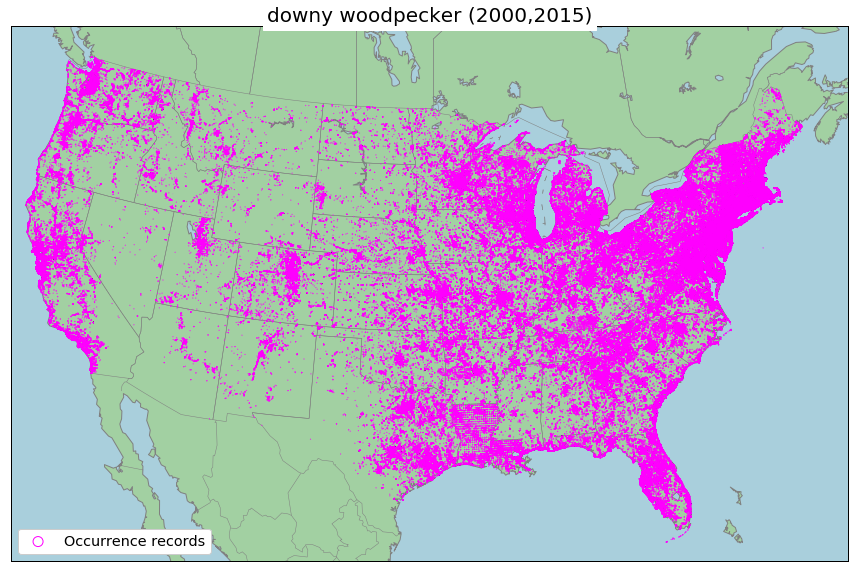

In [18]:
shp1 = {'file': '{0}{1}_polygons'.format(outDir, summary_name), 'column': None,
        'alias': 'Occurrence records', 'drawbounds': True, 'linewidth': .75, 'linecolor': 'magenta',
        'fillcolor': None, 'marker':'o'}

# Display occurrence polygons
map_these=[shp1]
    
title="{1} ({0})".format(years, common_name)
try:
    functions.MapShapefilePolygons(map_these=map_these, title=title)
except Exception as e:
    print("Unable to map:  " + str(e))

### Years represented

Text(0.5, 1.0, 'Occurrences per Year')

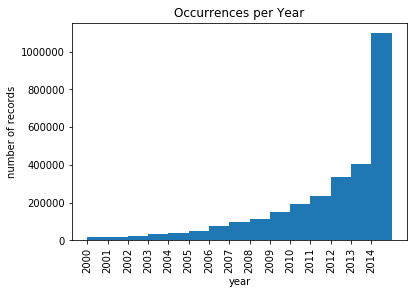

In [19]:
occ_years = [int(x[0]) for x in curs_occ.execute("SELECT strftime('%Y', occurrenceDate) FROM occurrences").fetchall()]
years = connjup.execute("SELECT years_range FROM gbif_requests WHERE request_id = '{0}'".format(gbif_req_id)).fetchone()[0]
years = years.split(',')
yearsrng = list(range(int(years[0]), int(years[1]), 1))
binsnum = int(years[1]) - int(years[0])
plt.hist(occ_years, bins=binsnum)
plt.ylabel("number of records")
plt.xlabel("year")
plt.xticks(yearsrng, rotation=90)
plt.title("Occurrences per Year")

### Months represented

Text(0.5, 1.0, 'Occurrences per Month')

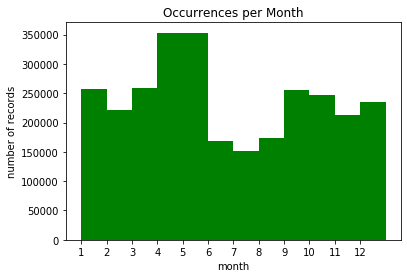

In [20]:
occ_months = [int(x[0]) for x in curs_occ.execute("SELECT strftime('%m', occurrenceDate) FROM occurrences").fetchall()]
plt.hist(occ_months, bins=range(1, 14), color="g")
plt.ylabel("number of records")
plt.xlabel("month")
plt.xticks(range(1, 13))
plt.title("Occurrences per Month")

### Distribution of coordinate uncertainty values

Text(0.5, 1.0, 'Coordinate Uncertainty')

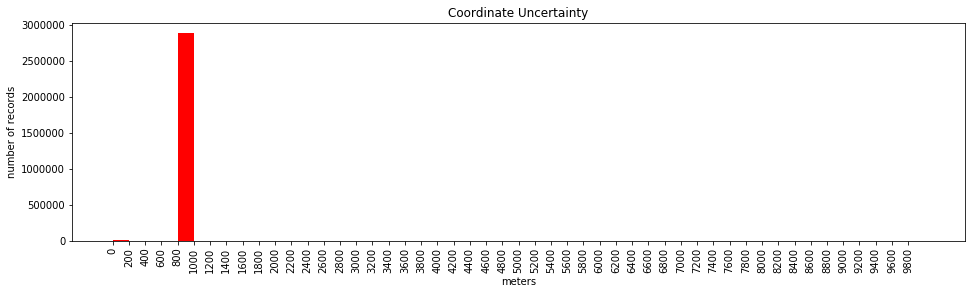

In [21]:
occ_cert = [int(x[0]) for x in curs_occ.execute("SELECT coordinateUncertaintyInMeters FROM occurrences").fetchall()]
maxi = np.max(occ_cert)
plt.figure(figsize=(16,4))
plt.hist(occ_cert, bins=50, color="r")
plt.xticks(range(0, maxi, int(maxi/50)), rotation=90)
plt.ylabel("number of records")
plt.xlabel("meters")
plt.title("Coordinate Uncertainty")

Text(0.5, 1.0, 'Coordinate Uncertainty')

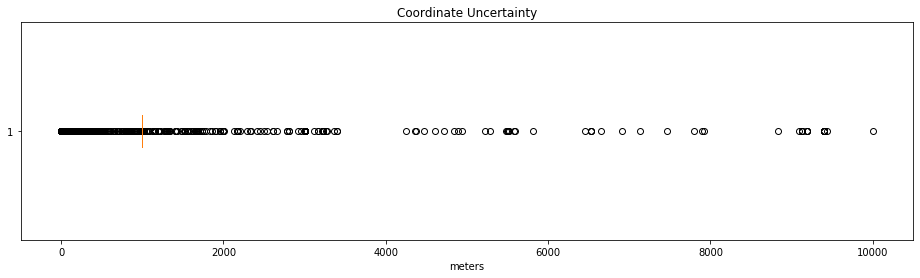

In [22]:
occ_cert = [int(x[0]) for x in curs_occ.execute("SELECT coordinateUncertaintyInMeters FROM occurrences").fetchall()]
plt.figure(figsize=(16,4))
plt.boxplot(occ_cert, vert=False)
plt.xlabel("meters")
plt.title("Coordinate Uncertainty")

Text(0.5, 1.0, 'Coordinate Uncertainties Below 2km')

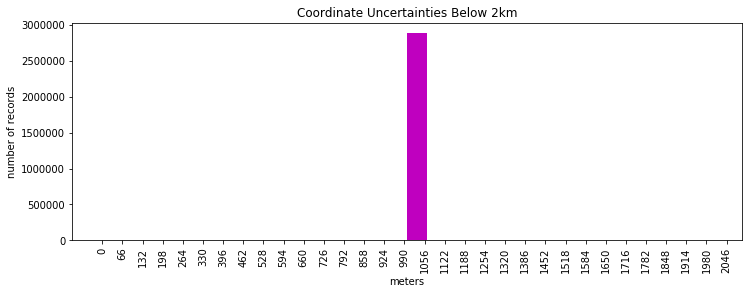

In [23]:
rng_max = 2000
occ_cert2 = [x for x in occ_cert if x <= rng_max]
plt.figure(figsize=(12,4))
plt.hist(occ_cert2, bins=30, color="m", align='mid')
plt.xticks(range(0, rng_max + 100, int(rng_max/30.)), rotation=90)
plt.ylabel("number of records")
plt.xlabel("meters")
plt.title("Coordinate Uncertainties Below 2km")

### Establishment means reported

In [24]:
establishment = curs_occ.execute("SELECT vals FROM unique_values WHERE field = 'establishment' AND step = 'filter';").fetchall()[0]
for est in establishment:
    est = est.replace('[', '').strip().replace(']', '').replace("'", "")
    print(est)

NATIVE, nan


### Identification qualifiers included

In [25]:
quali = curs_occ.execute("SELECT DISTINCT vals FROM unique_values WHERE field = 'IDqualifier' AND step = 'filter';").fetchall()[0]
for q in quali:
    q = q.replace('[', '').strip().replace(']', '').replace("'", "")
    print(q)

A, nan


### Remarks included

In [26]:
remarks = curs_occ.execute("SELECT DISTINCT remarks FROM occurrences;").fetchall()
if len(remarks) <= 20:
    try:
        for rem in remarks:
            if rem[0][0:1] == ';':
                print(rem[0][2:])
            else:
                print(rem[0])
    except:
        pass
else:
    print("More than 20 remarks, consult the occurrence database.")

### Attributes returned for the records in the request (pre-filters)

In [27]:
fields_summary = pd.read_sql("SELECT * FROM gbif_fields_returned", conn_occ)#, index_col='index')
fields_summary.index.name = 'Field'
pd.set_option('display.max_rows', 250)
print(fields_summary)

                                 attribute  included(n)  populated(n)
Field                                                                
0                                 abstract      2887795             0
1                             accessRights      2887795            22
2                            accrualMethod      2887795             0
3                       accrualPeriodicity      2887795             0
4                            accrualPolicy      2887795             0
5                              alternative      2887795             0
6                                 audience      2887795             0
7                                available      2887795             0
8                    bibliographicCitation      2887795           421
9                               conformsTo      2887795             0
10                             contributor      2887795             0
11                                coverage      2887795             0
12                  

### Runtime

In [28]:
t2 = datetime.now()
print(t2 - t1)

1:45:59.883555
